In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import xarray as xr
import cartopy.crs as ccrs

In [2]:
#netcdf data- import using xarray (renamed xr)
ds = xr.open_dataset('/Users/matthewq/Geol_599/week4/GEOS-CF_AirQuality_20180101_0030z.nc4')

In [3]:
ds

<xarray.Dataset>
Dimensions:        (lon: 1440, lat: 721, lev: 1, time: 1)
Coordinates:
  * lon            (lon) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * lat            (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lev            (lev) float64 72.0
  * time           (time) datetime64[ns] 2018-01-01T00:30:00
Data variables:
    CO             (time, lev, lat, lon) float32 ...
    NO2            (time, lev, lat, lon) float32 ...
    O3             (time, lev, lat, lon) float32 ...
    PM25_RH35_GCC  (time, lev, lat, lon) float32 ...
    SO2            (time, lev, lat, lon) float32 ...
Attributes: (12/28)
    Contact:               http://gmao.gsfc.nasa.gov
    History:               Original file generated: Mon Dec 24 13:37:28 2018 GMT
    Source:                cak_Icarus-1_0_GCCv12-00-01_v1_010 experiment_id: ...
    Conventions:           CF-1
    Title:                 GEOS CF (Composition Forecast)
    Institution:           NASA Global Modeling and Assimilation Office
    ...                    ...
    DataResolution:        0.25 x 0.25
    LongName:              GEOS CF 2d time-averaged air quality concentration...
    ShortName:             CF01Raqc_1hrT_g1440x721_V1
    Comment:               GMAO filename: c360_GEOS-CF.chm_tavg_1hr_g1440x721...
    Filename:              GEOS-CF.v01.rpl.aqc_tavg_1hr_g1440x721_v1.20180101...
    GranuleID:             GEOS-CF.v01.rpl.aqc_tavg_1hr_g1440x721_v1.20180101...

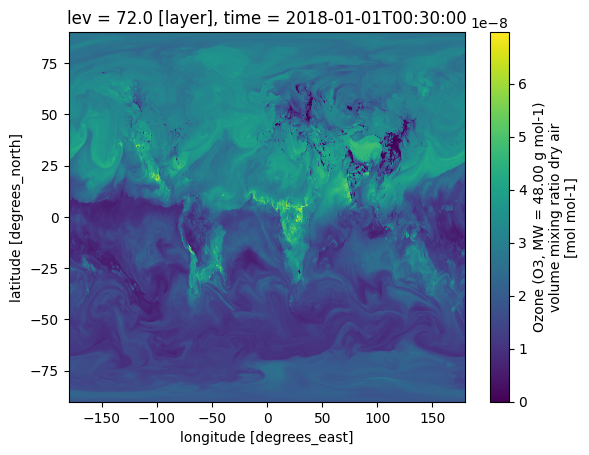

In [4]:
O3 = ds.O3
O3.plot()

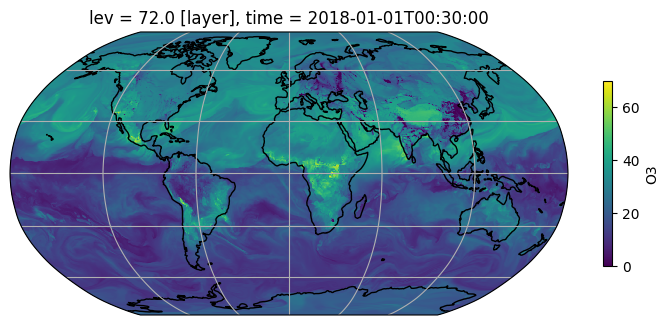

In [5]:
O3 = ds.O3 * 1e9 # convert to ppb

#coordinate reference system (map projection)
fig = plt.figure(figsize=(9,6))  
ax = plt.axes(projection=ccrs.Robinson()) 
O3.plot(ax=ax, transform=ccrs.PlateCarree(), 
        cbar_kwargs={'shrink': 0.4}) # This line just makes the axis smaller
ax.coastlines()  
ax.gridlines() 

O3 is qualitatively high in the northern hemisphere, qualitatively low in the southern hemisphere. It is also typically higher over continents than over the oceans

In [6]:
O3.where(O3==O3.max(), drop=True).squeeze()
#max (69.7 ppb) is just north of Los Angeles (34.5, -118.8)

<xarray.DataArray 'O3' ()>
array(69.73278, dtype=float32)
Coordinates:
    lon      float64 -118.8
    lat      float64 34.5
    lev      float64 72.0
    time     datetime64[ns] 2018-01-01T00:30:00

In [7]:
O3.where(O3==O3.min(), drop=True).squeeze()
#There are multiple locations with a minimum ozone concentration of 0 ppb. Excluding nan values there are 12 locations at which the O3 concentration is 0, falling long 4 latitudes (53, 53.25, 55.75, 56) and 8 longitudes(38.5, 38.75, 39, 39.25, 39.5, 73.25, 73.5, 73.75)

<xarray.DataArray 'O3' (lat: 4, lon: 8)>
array([[nan, nan, nan, nan, nan,  0.,  0., nan],
       [nan, nan, nan, nan, nan, nan,  0.,  0.],
       [ 0., nan,  0.,  0.,  0., nan, nan, nan],
       [nan,  0.,  0.,  0.,  0., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 38.5 38.75 39.0 39.25 39.5 73.25 73.5 73.75
  * lat      (lat) float64 53.0 53.25 55.75 56.0
    lev      float64 72.0
    time     datetime64[ns] 2018-01-01T00:30:00

In [8]:
#Ozone near LA
O3.sel(lat=[34.052235], lon=[-118.243683], method="nearest")
#ozone over LA = 45.5 ppb

<xarray.DataArray 'O3' (time: 1, lev: 1, lat: 1, lon: 1)>
array([[[[45.401974]]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -118.2
  * lat      (lat) float64 34.0
  * lev      (lev) float64 72.0
  * time     (time) datetime64[ns] 2018-01-01T00:30:00

In [9]:
#Ozone near Hawaii
O3.sel(lat=[19.741755], lon=[-155.844437], method="nearest")
#ozone over Hawaii = 37.3 ppb

<xarray.DataArray 'O3' (time: 1, lev: 1, lat: 1, lon: 1)>
array([[[[37.252903]]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -155.8
  * lat      (lat) float64 19.75
  * lev      (lev) float64 72.0
  * time     (time) datetime64[ns] 2018-01-01T00:30:00

Geol 599 Project Description

I. The data is water column physical parameters (temperature, pressure) and concentrations (e.g. O2, P, N, Si, Alk, and DIC) from the Global Ocean Data Analysis Project (GLODAP) between latitudes 10.057° N and 1.661° S, and longitudes 94.151° W and 86.696° W. These data are merged with data collected during a cruise in the area between November and December 2021. In total, there are ~1,800 data points.
II.	regression analysis 
III. I believe the available data can be used to determine how an expanding oxygen minimum zone in the area is affecting alkalinity production and other biogeochemical cycling now and into the future.